In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')

# 1. Reading the dataset to the python environment.

In [2]:
data = pd.read_excel(r"C:\Users\saheer\Downloads\iris (1).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Doing necessary pre-processing steps.

Checking for null values

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Handling missing values 

In [6]:
data['SL'] = data['SL'].fillna(data['PL'].mean())
data['SW'] = data['SW'].fillna(data['PL'].mean())
data['PL'] = data['PL'].fillna(data['PL'].mean())

In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Handling outliers

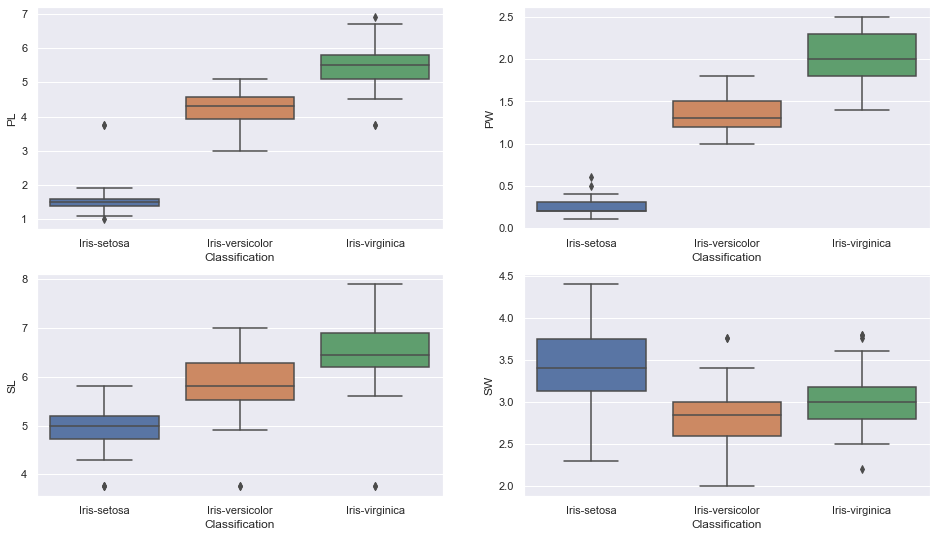

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=data['PL'], x= 'Classification', data=data, orient='v' , ax=axes[0, 0])
sns.boxplot( y=data['PW'], x= 'Classification', data=data, orient='v' , ax=axes[0, 1])
sns.boxplot( y=data['SL'], x= 'Classification', data=data, orient='v' , ax=axes[1, 0])
sns.boxplot( y=data['SW'], x= 'Classification', data=data, orient='v' , ax=axes[1, 1])
plt.show()

In [11]:
for column in data.columns[0:4]:
    for classification in data["Classification"].unique():
        class_type = data[data["Classification"] == classification]
        Selected_column = class_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        data.drop(index = outlierss, inplace=True) # dropping outliers

Int64Index([2, 21, 39], dtype='int64')
Int64Index([51, 85], dtype='int64')
Int64Index([106, 141], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([72, 98], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([22, 28, 42], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([109, 147], dtype='int64')
Int64Index([23, 43], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


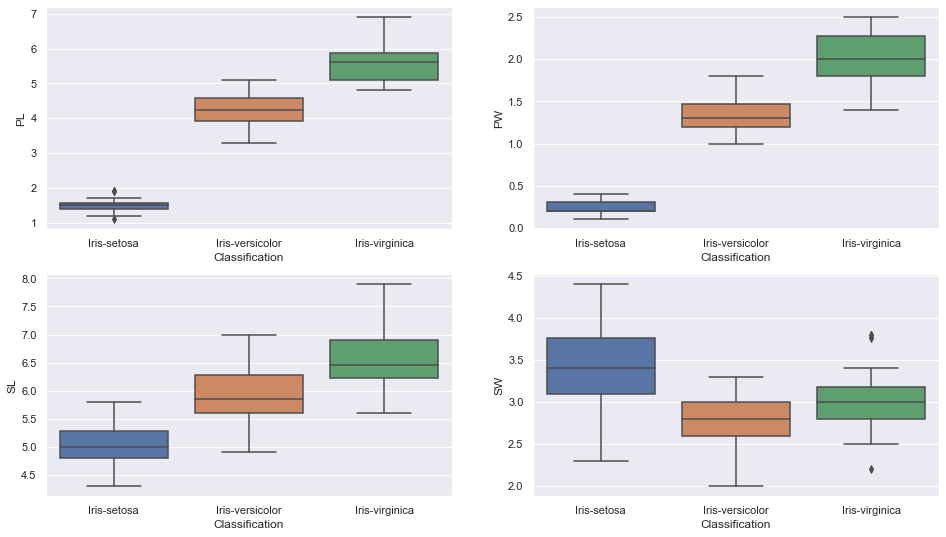

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=data['PL'], x= 'Classification', data=data, orient='v' , ax=axes[0, 0])
sns.boxplot( y=data['PW'], x= 'Classification', data=data, orient='v' , ax=axes[0, 1])
sns.boxplot( y=data['SL'], x= 'Classification', data=data, orient='v' , ax=axes[1, 0])
sns.boxplot( y=data['SW'], x= 'Classification', data=data, orient='v' , ax=axes[1, 1])
plt.show()

<AxesSubplot:>

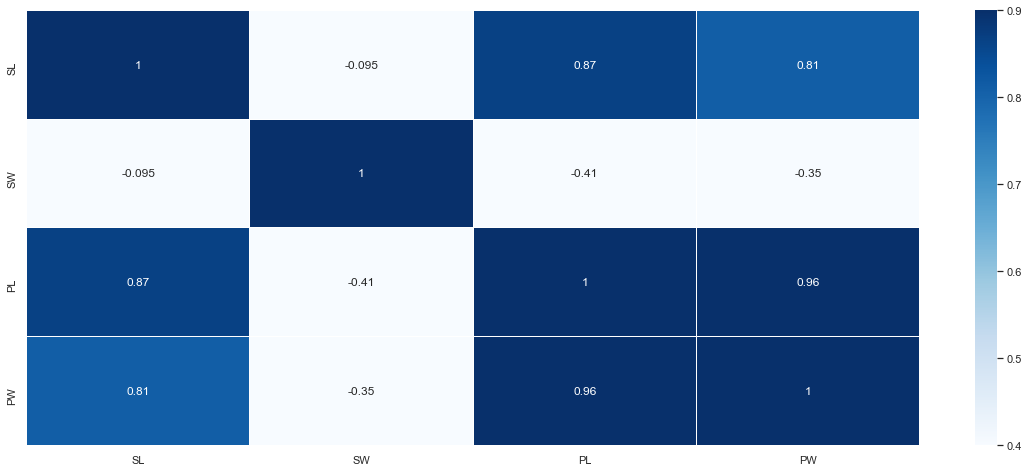

In [13]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='Blues')

Feature Engineering

In [19]:
y = data['Classification']
x = data.drop('Classification',axis=1)

In [20]:
x['mean'] = x[['SW', 'SL', 'PW', 'PL']].mean(axis = 1)
x['sum'] = x[['SW', 'SL', 'PW', 'PL']].sum(axis = 1)
x['skew'] = x[['SW', 'SL', 'PW', 'PL']].skew(axis = 1)
x['kurt'] = x[['SW', 'SL', 'PW', 'PL']].kurt(axis = 1)

In [21]:
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'mean', 'sum', 'skew', 'kurt'], dtype='object')

Splitting the data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

Standard Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 3. Finding out which classification model gives the best result to predict iris species.(also do random forest algorithm)

Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [26]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [27]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 12]], dtype=int64)

KNN Algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred =  classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [29]:
acc_values

[0.9512195121951219,
 0.975609756097561,
 0.926829268292683,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561]

Text(0, 0.5, 'Accuracy')

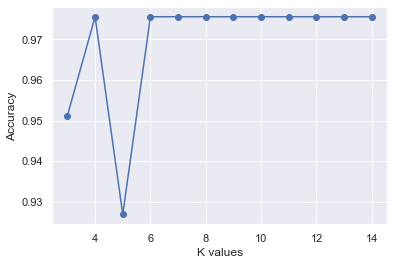

In [30]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   

In [32]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.926829268292683
Precision is:  0.926829268292683
Recall is:  0.926829268292683
F1 score is:  0.926829268292683


In [33]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 12]], dtype=int64)

Decision Tree Algorithm

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [35]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9512195121951219
Precision is:  0.9512195121951219
Recall is:  0.9512195121951219
F1 score is:  0.9512195121951219


In [36]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 11]], dtype=int64)

Support Vector Machine---Linear Kernel

In [37]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

In [38]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9512195121951219
Precision is:  0.9512195121951219
Recall is:  0.9512195121951219
F1 score is:  0.9512195121951219


In [39]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 12]], dtype=int64)

Support Vector Machine---Polynomial Kernel

In [40]:
svm_poly = SVC(kernel = 'poly', degree = 3)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)

In [41]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9512195121951219
Precision is:  0.9512195121951219
Recall is:  0.9512195121951219
F1 score is:  0.9512195121951219


In [42]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]], dtype=int64)

Support Vector Machine---Radial Basis Function Kernel

In [43]:
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(x_train,y_train)
y_pred = svm_radial.predict(x_test)

In [44]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


In [45]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]], dtype=int64)

Random Forest Classifier Algorithm

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [48]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


In [49]:
confusion_matrix (y_test, y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]], dtype=int64)